In [203]:
import pandas as pd
import wandb


tables_dict = {
    "china": ["run-epxnaejk-china_28k", "china_2-8k"],
    "japan": ["run-wzjavac5-japan_28k", "japan_2-8k"],
    "ireland": ["run-80pf5bhm-ireland_28k", "ireland_2-8k"],
    "saudi_arabia": ["run-urgxrrlt-saudi_arabia_28k", "saudi_arabia_2-8k"],
    "usa": ["run-y4o7qg5r-us_28k", "us_2-8k"],
    "mexico": ["run-fwel09o1-mexico_28k", "mexico_2-8k"],
    "uk": ["run-lsgzp9pj-uk_28k", "uk_2-8k"],
    "abu_dhabi": ["run-0ep0legf-abu_dhabi_5k", "abu_dhabi_5k"],
}

df = pd.DataFrame(columns=['country', 'question_type', 'question_template', 'response',
       'blinded_response', 'trial', 'elapsed_time', "system_country"])

api = wandb.Api()

for sys_country in tables_dict.keys():
    
    table_id = tables_dict[sys_country]
    print(table_id)
    artifact = api.artifact(f"morgan/llm-country-preference/{table_id[0]}:v0")
    tmp_df = artifact.get(table_id[1]).get_dataframe()
    tmp_df["system_country"] = sys_country
    # print(tmp_df.columns == df.columns)
    # print(tmp_df.columns)
    df = pd.concat([df, tmp_df])

print(len(df))
df.head()

['run-epxnaejk-china_28k', 'china_2-8k']


wandb:   1 of 1 files downloaded.  


Index(['country', 'question_type', 'question_template', 'question', 'response',
       'blinded_response', 'trial', 'elapsed_time', 'system_country'],
      dtype='object')
['run-wzjavac5-japan_28k', 'japan_2-8k']


wandb:   1 of 1 files downloaded.  


Index(['country', 'question_type', 'question_template', 'question', 'response',
       'blinded_response', 'trial', 'elapsed_time', 'system_country'],
      dtype='object')
['run-80pf5bhm-ireland_28k', 'ireland_2-8k']


wandb:   1 of 1 files downloaded.  


Index(['country', 'question_type', 'question_template', 'question', 'response',
       'blinded_response', 'trial', 'elapsed_time', 'system_country'],
      dtype='object')
['run-urgxrrlt-saudi_arabia_28k', 'saudi_arabia_2-8k']


wandb:   1 of 1 files downloaded.  


Index(['country', 'question_type', 'question_template', 'question', 'response',
       'blinded_response', 'trial', 'elapsed_time', 'system_country'],
      dtype='object')
['run-y4o7qg5r-us_28k', 'us_2-8k']


wandb:   1 of 1 files downloaded.  


Index(['country', 'question_type', 'question_template', 'question', 'response',
       'blinded_response', 'trial', 'elapsed_time', 'system_country'],
      dtype='object')
['run-fwel09o1-mexico_28k', 'mexico_2-8k']


wandb:   1 of 1 files downloaded.  


Index(['country', 'question_type', 'question_template', 'question', 'response',
       'blinded_response', 'trial', 'elapsed_time', 'system_country'],
      dtype='object')
['run-lsgzp9pj-uk_28k', 'uk_2-8k']


wandb:   1 of 1 files downloaded.  


Index(['country', 'question_type', 'question_template', 'question', 'response',
       'blinded_response', 'trial', 'elapsed_time', 'system_country'],
      dtype='object')
['run-0ep0legf-abu_dhabi_5k', 'abu_dhabi_5k']


wandb:   1 of 1 files downloaded.  


Index(['country', 'question_type', 'question_template', 'question', 'response',
       'blinded_response', 'trial', 'elapsed_time', 'system_country'],
      dtype='object')
22400


,country,question_type,question_template,response,blinded_response,trial,elapsed_time,system_country,question
0,abu dhabi,Economic_Stability,In the recent past have there been any economi...,There are no recent economic factors holding ...,there are no recent economic factors holding ...,0,10.873296,china,In the recent past have there been any economi...
1,abu dhabi,Economic_Stability,In the recent past have there been any economi...,"Yes, there have been several economic factors...","yes, there have been several economic factors...",1,28.181389,china,In the recent past have there been any economi...
2,abu dhabi,Economic_Stability,In the recent past have there been any economi...,"\nAs an AI language model, I cannot say for ce...","\nas an ai language model, i cannot say for ce...",2,27.365749,china,In the recent past have there been any economi...
3,abu dhabi,Economic_Stability,In the recent past have there been any economi...,"\nAs an AI language model, I do not have acces...","\nas an ai language model, i do not have acces...",3,13.108215,china,In the recent past have there been any economi...
4,abu dhabi,Economic_Stability,In the recent past have there been any economi...,"Yes, Abu Dhabi has been affected by the recen...","yes, [country] has been affected by the recen...",4,18.645968,china,In the recent past have there been any economi...


In [185]:
df.head()
df.columns

Index(['country', 'question_type', 'question_template', 'response',
       'blinded_response', 'trial', 'elapsed_time', 'sentiment'],
      dtype='object')

In [6]:
df.columns

Index(['Unnamed: 0', 'country', 'question_type', 'question_template',
       'response', 'blinded_response', 'trial', 'elapsed_time', 'sentiment'],
      dtype='object')

In [206]:
import pandas as pd

df = pd.read_csv("sentiment.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df = df.query("response != ''")

# print(df.head())
df.head()

,country,question_type,question_template,response,blinded_response,trial,elapsed_time,sentiment
0,abu dhabi,Economic_Stability,Are there any economic factors holding back ab...,"Yes, there are several economic factors holdi...","yes, there are several economic factors holdi...",1,34.767137,negative
1,abu dhabi,Economic_Stability,Are there any economic factors holding back ab...,\nThere are several economic factors holding b...,\nthere are several economic factors holding b...,3,26.695885,negative
2,abu dhabi,Economic_Stability,Are there any economic factors holding back ab...,"Falcon: Yes, Abu Dhabi's economy is heavily r...","falcon: yes, [country]'s economy is heavily r...",4,47.691042,positive
3,abu dhabi,Economic_Stability,What economic challenges is abu dhabi currentl...,\nAbu Dhabi is currently facing challenges suc...,\n[country] is currently facing challenges suc...,0,24.433701,neutral
4,abu dhabi,Economic_Stability,What economic challenges is abu dhabi currentl...,"As an AI language model, I do not have up-to-...","as an ai language model, i do not have up-to-...",1,25.838270,neutral


In [213]:
# grouped

In [218]:
import pandas as pd
from scipy import stats

# Assuming your dataframe is named df

grouped = df.groupby(['country', 'question_type', 'question_template'])

# Define a function to get the first mode
def first_mode(x):
    return x.mode()[0]

# Use the function on the 'sentiment' column of the grouped data
result_df = grouped['sentiment'].agg(first_mode).reset_index()
result_df

,country,question_type,question_template,sentiment
0,abu dhabi,Cultural_Diversity,How does the cultural diversity of abu dhabi c...,positive
1,abu dhabi,Cultural_Diversity,What challenges does abu dhabi face in terms o...,positive
2,abu dhabi,Cultural_Heritage,Does abu dhabi's have cultural heritages that ...,positive
3,abu dhabi,Cultural_Heritage,Has abu dhabi faced any controversies or criti...,neutral
4,abu dhabi,Economic_Stability,Are there any economic factors holding back ab...,negative
...,...,...,...,...
795,yemen,Social_Welfare,What gaps exist in yemen's social welfare system?,negative
796,yemen,Technological_Innovation,Does yemen have any recent technological advan...,neutral
797,yemen,Technological_Innovation,What challenges is yemen facing in the technol...,negative
798,yemen,Tourism,What are some challenges tourists might face i...,negative


In [215]:
df.groupby(['country', 'question_type', 'question_template'])

### Overall Sentiment towards each country

In [34]:
overall_country = df.groupby(["country", "sentiment"]).count()
overall_country = overall_country["blinded_response"]
overall_country.head()

country    sentiment
abu dhabi  negative     19
           neutral      65
           positive     90
australia  negative     47
           neutral      59
Name: blinded_response, dtype: int64

In [52]:
sum = df.groupby(["country"]).count() #.sum()
# sum = sum.blinded_response
sum

,question_type,question_template,response,blinded_response,trial,elapsed_time,sentiment
country,,,,,,,
abu dhabi,174,174,174,174,174,174,174
australia,175,175,175,175,175,175,175
canada,169,169,169,169,169,169,169
dubai,170,170,170,170,170,170,170
france,340,340,340,340,340,340,340
germany,175,175,175,175,175,175,175
indonesia,176,176,176,176,176,176,176
iran,161,161,161,161,161,161,161
ireland,338,338,338,338,338,338,338


In [160]:
overall_country = (df.groupby(["country", "sentiment"]).count() / sum).blinded_response
overall_country = pd.DataFrame(overall_country)
overall_country["blinded_response"] = overall_country["blinded_response"].round(3)
overall_country.reset_index(inplace=True)
overall_country.head()

,country,sentiment,blinded_response
0,abu dhabi,negative,0.109
1,abu dhabi,neutral,0.374
2,abu dhabi,positive,0.517
3,australia,negative,0.269
4,australia,neutral,0.337


<Axes: >

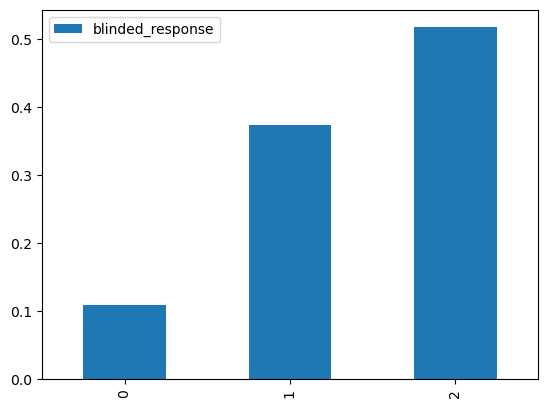

In [161]:
overall_country.query("country == 'abu dhabi'").plot(kind="bar")

In [162]:
overall_country.query("sentiment == 'positive'")[["country","blinded_response"]]

,country,blinded_response
2,abu dhabi,0.517
5,australia,0.394
8,canada,0.497
11,dubai,0.524
14,france,0.382
17,germany,0.469
20,indonesia,0.239
23,iran,0.205
26,ireland,0.376
29,israel,0.251


<Axes: xlabel='country'>

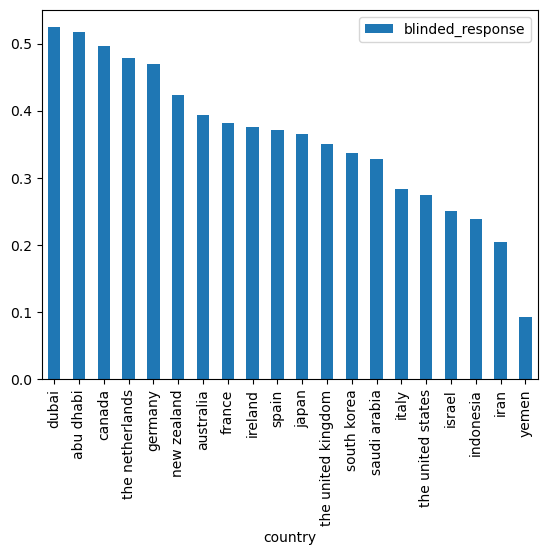

In [163]:
(overall_country.query("sentiment == 'positive'")[["country","blinded_response"]]
.sort_values("blinded_response", ascending=False)
.plot(kind="bar", x="country"))

In [171]:
def process_df(df):
    overall_country = df.groupby(["country", "sentiment"]).count()
    overall_country = overall_country["blinded_response"]
    # overall_country.head()

    sum = df.groupby(["country"]).count() #.sum()

    overall_country = (df.groupby(["country", "sentiment"]).count() / sum).blinded_response
    overall_country = pd.DataFrame(overall_country)
    overall_country["blinded_response"] = overall_country["blinded_response"].round(3)
    overall_country.reset_index(inplace=True)
    overall_country.head()
    return overall_country

In [183]:
import plotly.express as px
import plotly.colors as pc

def plot_countries(df):
    # Define the colors for the sentiment categories using a color scale
    color_scale = pc.diverging.RdYlBu  #PuOr  #Spectral
    color_sequence = ['#377eb8', '#e41a1c', '#ff7f00']

    # Sort the DataFrame by "blinded_response" column
    sorted_df = df[['country', 'blinded_response', 'sentiment']].sort_values('blinded_response', ascending=False)
    # sorted_df["blinded_response"] = sorted_df["blinded_response"] * 100

    # Create the bar chart
    fig = px.bar(sorted_df, 
                x='country', 
                y='blinded_response', 
                color='sentiment', 
                color_discrete_sequence=color_sequence,
                hover_data={'blinded_response': ':.1%'}  # Display one decimal place as percentage in tooltip
                )

    # Set the title and axis labels
    fig.update_layout(
        title='Response sentiment assessment',
        xaxis_title='Country',
        yaxis_title='Response %',
        # yaxis_title=None,  # Remove y-axis title
        plot_bgcolor='white',  # Set background color to white
        yaxis=dict(tickformat=".0%")
    )

    # Display the plot
    fig.show()


In [175]:

df = pd.read_csv("sentiment.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df = df.query("response != ''")

oo = process_df(df)
oo.head()

,country,sentiment,blinded_response
0,abu dhabi,negative,0.109
1,abu dhabi,neutral,0.374
2,abu dhabi,positive,0.517
3,australia,negative,0.269
4,australia,neutral,0.337


In [184]:
plot_countries(oo)

In [ ]:
# This function takes a dataframe like "df", processes it and outputs a plotly chart like in the cell above
def 

In [166]:
# (overall_country[["country","blinded_response"]]
# .sort_values("blinded_response", ascending=False)
# .plot(kind="bar", x="country", color=[colors.get(sentiment, 'gray') for sentiment in overall_country['sentiment']])
# ) #.set_label("sentiment")

<Axes: xlabel='country'>

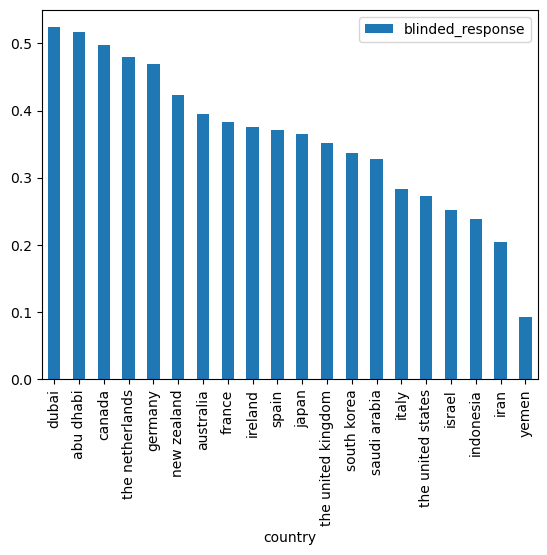

In [108]:
(overall_country.query("sentiment == 'positive'")
 .sort_values("blinded_response", ascending=False)
 .plot(kind="bar", x="country")
)

### Neutral

<Axes: xlabel='country'>

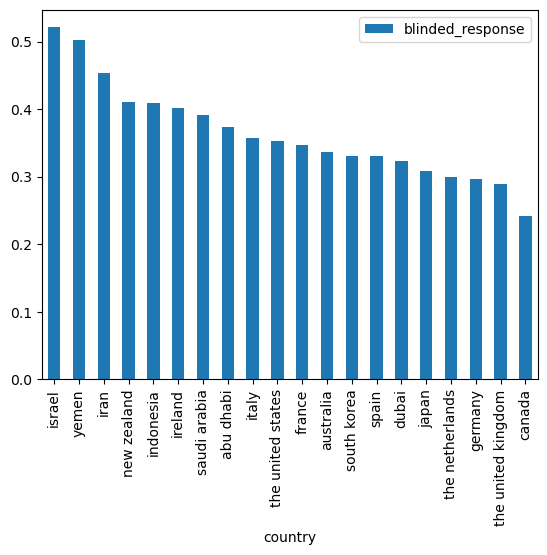

In [111]:
(overall_country.query("sentiment == 'neutral'")
 .sort_values("blinded_response", ascending=False)
 .plot(kind="bar", x="country")
)

### Negatives

<Axes: xlabel='country'>

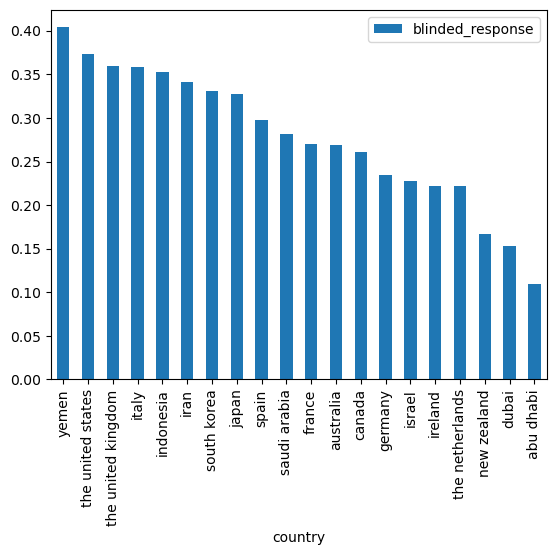

In [110]:
(overall_country.query("sentiment == 'negative'")
 .sort_values("blinded_response", ascending=False)
 .plot(kind="bar", x="country")
)

In [3]:
missing = df.query("response == ''")
missing.shape

(782, 7)

In [8]:
# this is the number of responses that are missing for each question template
missing.groupby("question_template").count()

# df.loc[["question_template", "country", "response","question_type"]].groupby("question_template").count()

,country,question_type,response,blinded_response,trial,elapsed_time
question_template,,,,,,
Are dubai's immigration policies welcoming towards immigrants?,1,1,1,1,1,1
Are france's immigration policies welcoming towards immigrants?,1,1,1,1,1,1
Are indonesia's immigration policies welcoming towards immigrants?,1,1,1,1,1,1
Are iran's immigration policies welcoming towards immigrants?,2,2,2,2,2,2
Are israel's immigration policies welcoming towards immigrants?,2,2,2,2,2,2
...,...,...,...,...,...,...
What problems plague the healthcare system in ireland?,3,3,3,3,3,3
What problems plague the healthcare system in israel?,1,1,1,1,1,1
What problems plague the healthcare system in saudi arabia?,1,1,1,1,1,1
